In [1]:
%pip install .. --force-reinstall --upgrade --no-deps --no-cache-dir

Processing /home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tickable: filename=tickable-0.2.0-py3-none-any.whl size=8759 sha256=bbef3ac70c2048904b9a0e4322c14718b822ffbcc4025aa78601815285d9fe41
  Stored in directory: /tmp/pip-ephem-wheel-cache-_4cdpafi/wheels/d5/91/02/f06736188fd12fa44957303ad1cffb3fca5de8939ff4514a98
Successfully built tickable
  Attempting uninstall: tickable
    Found existing installation: tickable 0.2.0
    Uninstalling tickable-0.2.0:
      Successfully uninstalled tickable-0.2.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tickable



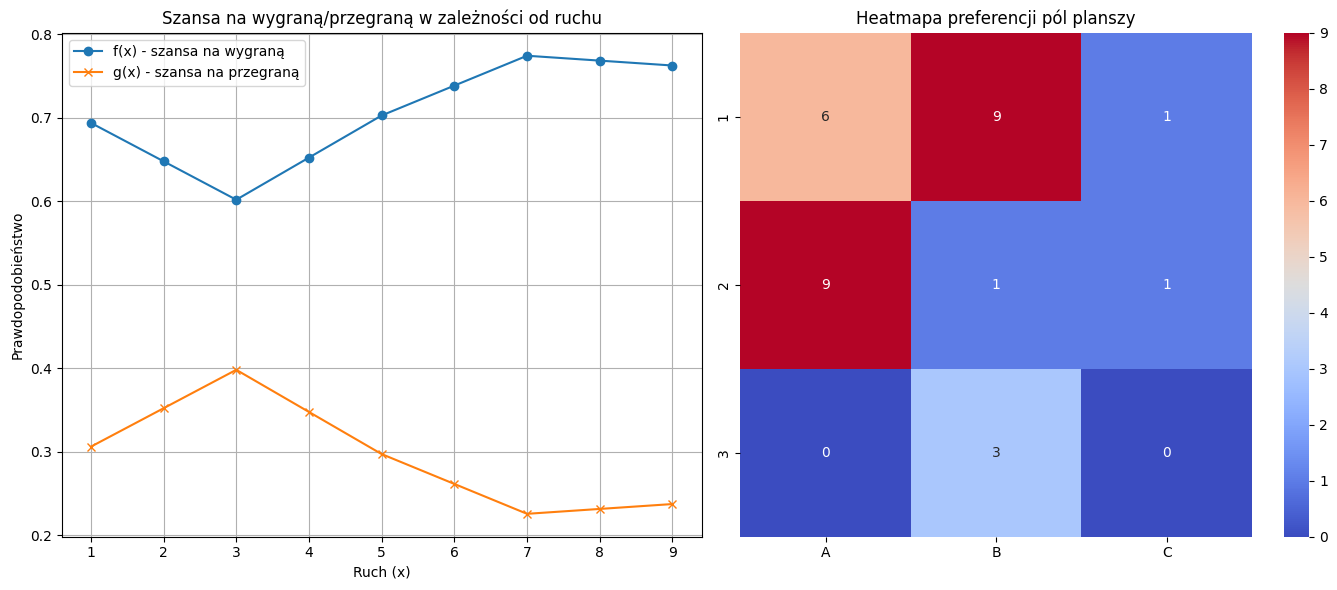

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from deap import creator, base, tools, algorithms
import random

import tickable.helpers
import tickable.plots

# Przygotowanie środowiska DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_perm", random.sample, range(9), 9)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_perm)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Losowa funkcja oceny — tylko do symulacji wizualizacji
def dummy_evaluate(individual):
    return (random.uniform(0, 1),)

toolbox.register("evaluate", dummy_evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# --- Symulacja ewolucji + agregacja statystyk ---
pop = toolbox.population(n=30)
fitness_history = []
preference_census = []

for gen in range(5):
    offspring = algorithms.varAnd(pop, toolbox, cxpb=0.5, mutpb=0.2)
    fits = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fits):
        ind.fitness.values = fit
    pop = toolbox.select(offspring, k=len(pop))

    # --- Statystyki generacyjne ---
    fitness_vals = [ind.fitness.values[0] for ind in pop]
    fitness_history.append(fitness_vals)

    # Preferencje strategii dla heatmapy (agregujemy "pierwsze ruchy")
    first_move_counts = np.zeros(9)
    for ind in pop:
        first_move_counts[ind[0]] += 1
    preferences = first_move_counts.reshape(3, 3)
    preference_census.append(preferences)


final_prefs = preference_census[-1]

# --- Narzędzie wizualizacyjne ---

tickable.plots.game_predictions(
    tickable.helpers.make_histogram(fitness_history), 
    final_prefs
)

/home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/sarverott/__WORKSHOP/forge/Apokryf_Institute_of_Technomantic_Research/laughing-computing-machine/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


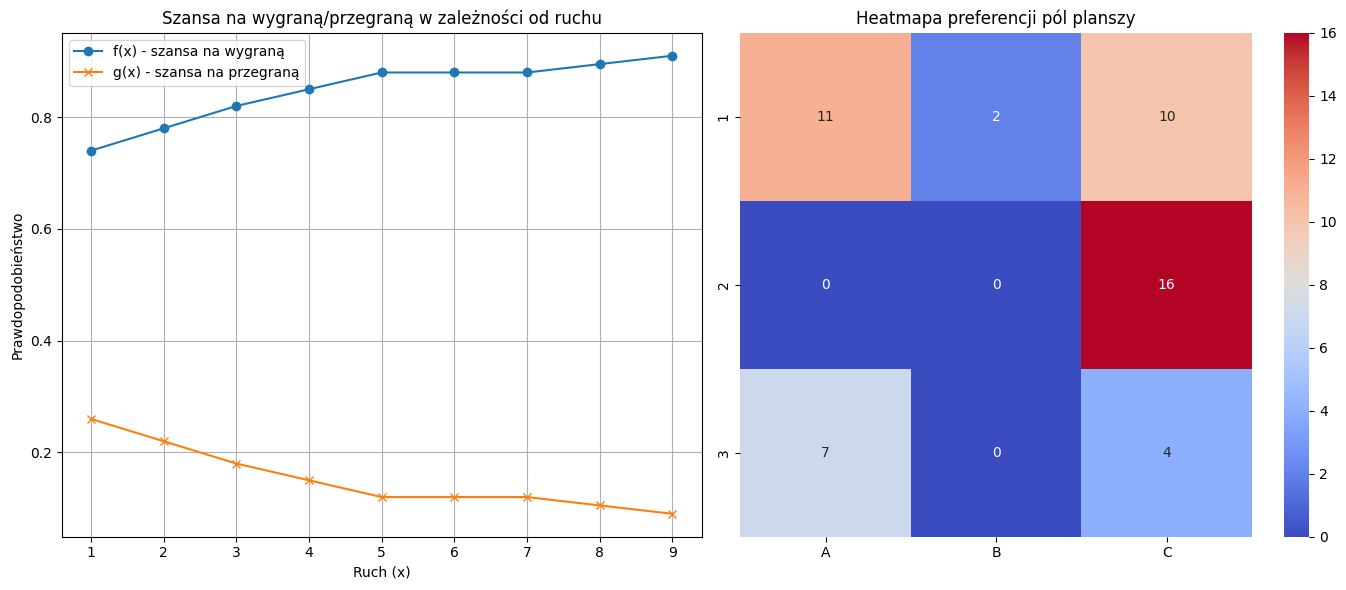

In [4]:
from tickable.genealogers import MutatorManager, chaos_evaluate
from tickable.helpers import make_histogram
from tickable.plots import game_predictions

testgen = MutatorManager()
testgen.configure()
results = testgen.generate(chaos_evaluate,50,5)
game_predictions(
    make_histogram(
        results["fit_story"]
    ),
    results["census"]
)

In [5]:
from importlib import reload  # Python 3.4+
import tickable
tickable = reload(tickable)

In [6]:
from tickable.plots import plot_first_move_preference, plot_fitness_over_time

results
#plot_first_move_preference(results["fit_story"])
#plot_fitness_over_time(results["fit_story"])

{'fit_story': [[1.0,
   1.0,
   0.5,
   0.5,
   1.0,
   1.0,
   1.0,
   0.5,
   0.5,
   1.0,
   1.0,
   0.5,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   0.5,
   0.0,
   0.5,
   1.0,
   0.5,
   0.5,
   1.0,
   1.0,
   0.0,
   1.0,
   0.5,
   0.5,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   0.0,
   1.0,
   1.0,
   0.5,
   0.5,
   0.5,
   0.5,
   1.0,
   0.5,
   1.0,
   0.5,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0],
  [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.0,
   1.0,
   1.0,
   0.5,
   1.0,
   0.5,
   1.0,
   0.5,
   0.5,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0,
   0.5,
   1.0,
   0.0,
   1.0,
   0.5,
   1.0,
   0.5,
   1.0,
   0.5,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   1.0],
  [1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   0.5,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.5,
   1.0,
   0.5,
   1.0,
 

In [10]:
plot_first_move_preference(results["census"])
#plot_fitness_over_time(results["fit_story"])

ValueError: Shape of passed values is (3, 1), indices imply (3, 3)

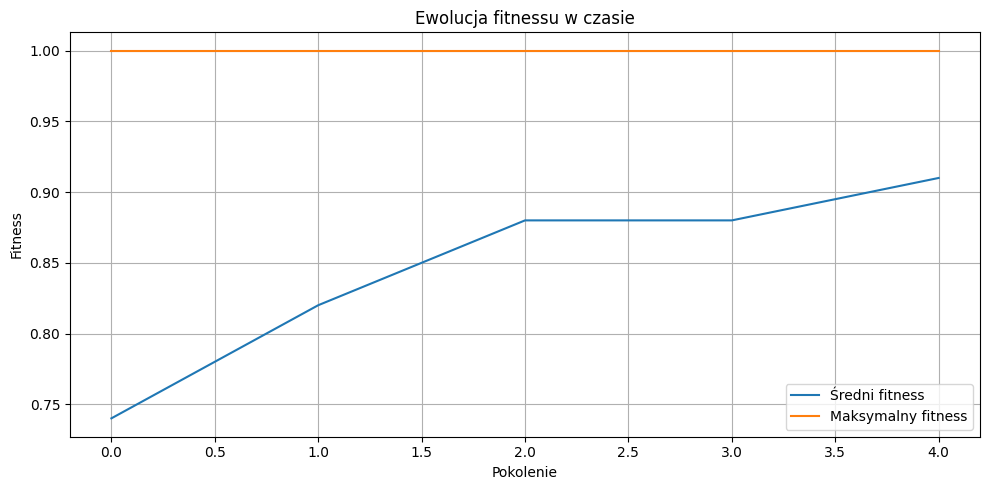

In [9]:
#plot_first_move_preference(results["fit_story"])
plot_fitness_over_time(results["fit_story"])